# Import Dependencies

In [ ]:
!pip install tensorflow_decision_forests # install the missing module
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import xgboost as xgb

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
uploaded = files.upload()

Saving plant_growth_data.csv to plant_growth_data (1).csv


In [ ]:
dataset = pd.read_csv("plant_growth_data.csv")
print("Full train dataset shape is {}".format(dataset.shape))

Full train dataset shape is (193, 8)


In [ ]:
dataset.head(3)

,Plant_Number,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,2,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,3,loam,8.892769,bi-weekly,none,23.179059,44.660539,0


Detecting Outliers

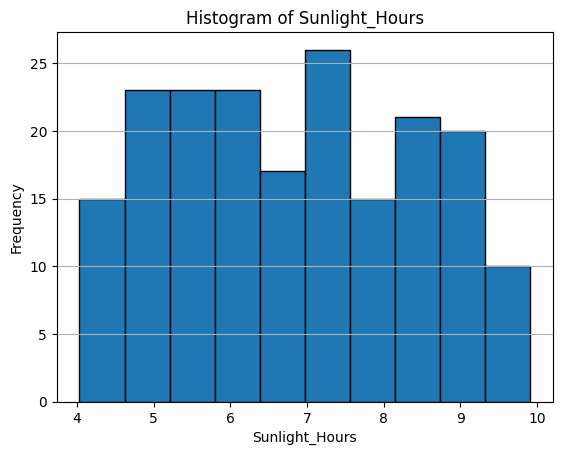

In [ ]:
# Histogram for Sunlight_Hours
plt.hist(dataset['Sunlight_Hours'], bins=10, edgecolor='black')
plt.xlabel('Sunlight_Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Sunlight_Hours')
plt.grid(axis='y')
plt.show()

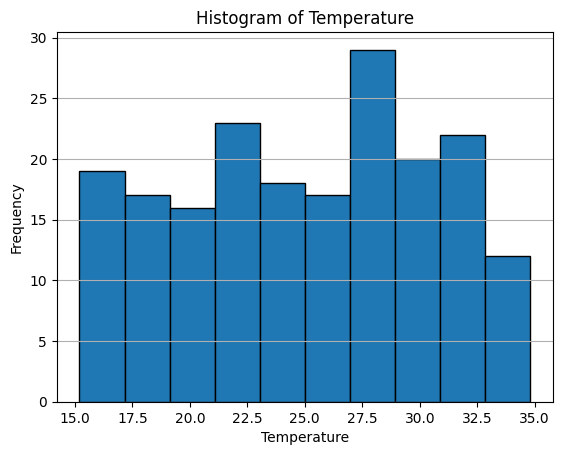

In [ ]:
# Histogram for Temperature
plt.hist(dataset['Temperature'], bins=10, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.grid(axis='y')
plt.show()

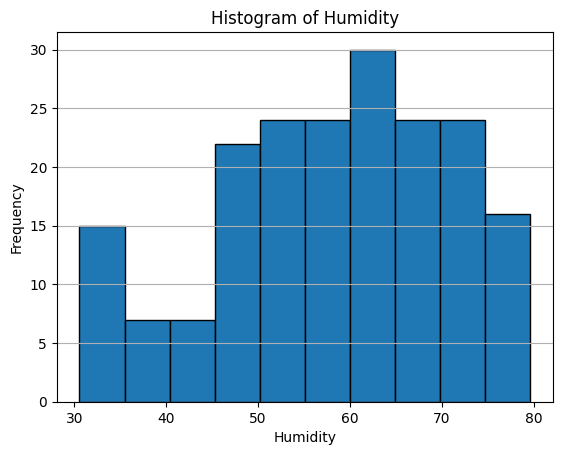

In [ ]:
# Histogram for Humidity
plt.hist(dataset['Humidity'], bins=10, edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')
plt.grid(axis='y')
plt.show()

Detect Missing Values

In [ ]:
missing_values = dataset.isna().sum()

print(missing_values)

Plant_Number        0
Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


In [ ]:
dataset.head(3)

,Plant_Number,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,2,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,3,loam,8.892769,bi-weekly,none,23.179059,44.660539,0


Drop Unnecessary Data

In [ ]:
dataset = dataset.drop("Plant_Number", axis=1)

dataset.head(3)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0


Splitting Dataset

In [ ]:
# Features and target
X = dataset.drop(columns=['Growth_Milestone'])  # Independent variables
y = dataset['Growth_Milestone']  # Dependent variable (target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

One-hot Encode Categorical Variables

In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])
X_test_encoded = pd.get_dummies(X_test, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])

# Convert boolean to binary
X_train_encoded_binary = X_train_encoded.astype(int)
X_test_encoded_binary = X_test_encoded.astype(int)

# Ensure binary values
soilType_columns = [col for col in X_train_encoded.columns if 'Soil_Type_' in col]
X_train_encoded[soilType_columns] = X_train_encoded[soilType_columns].astype(int)
X_test_encoded[soilType_columns] = X_test_encoded[soilType_columns].astype(int)

waterFrequency_columns = [col for col in X_train_encoded.columns if 'Water_Frequency_' in col]
X_train_encoded[waterFrequency_columns] = X_train_encoded[waterFrequency_columns].astype(int)
X_test_encoded[waterFrequency_columns] = X_test_encoded[waterFrequency_columns].astype(int)

fertilizerType_columns = [col for col in X_train_encoded.columns if 'Fertilizer_Type_' in col]
X_train_encoded[fertilizerType_columns] = X_train_encoded[fertilizerType_columns].astype(int)
X_test_encoded[fertilizerType_columns] = X_test_encoded[fertilizerType_columns].astype(int)

X_train_encoded.head(3)
X_test_encoded.head(3)

,Sunlight_Hours,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
57,4.041713,15.364437,78.493941,0,0,1,0,1,0,1,0,0
167,5.124000,27.100000,62.300000,0,0,1,0,1,0,0,0,1
67,6.181778,28.934743,64.787434,1,0,0,1,0,0,1,0,0


Combine Features with target labels

In [ ]:
# Combine features with target labels
train_ds_pd = pd.concat([X_train, y_train], axis=1)
valid_ds_pd = pd.concat([X_test, y_test], axis=1)

In [ ]:
label = 'Growth_Milestone'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.CLASSIFICATION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.CLASSIFICATION)

In [ ]:
train_ds_pd.head(3)
valid_ds_pd.head(3)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
57,sandy,4.041713,daily,chemical,15.364437,78.493941,0
167,sandy,5.124000,daily,organic,27.100000,62.300000,1
67,clay,6.181778,bi-weekly,chemical,28.934743,64.787434,1


Random Forest

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.CLASSIFICATION)
rf.compile(metrics=["accuracy", "mse"])

Use /tmp/tmpv8u2o581 as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.914077. Found 135 examples.
Training model...
Model trained in 0:00:00.330755
Compiling model...
Model compiled.


In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=135, accuracy=0.562962962962963, loss=0.7101559024442126, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = rf.evaluate(train_ds)
print('Test Accuracy (Classification):', evaluation[1])
print('Test MSE (Classification):', evaluation[2])

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 0.9556 - mse: 0.0867
Test Accuracy (Classification): 0.9555555582046509
Test MSE (Classification): 0.08668649941682816


GradientBoostedTreeModel

In [ ]:
gbt = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.CLASSIFICATION)
gbt.compile(metrics=["accuracy", "mse"])

Use /tmp/tmpk0wrvcje as temporary training directory


In [ ]:
gbt.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.214283. Found 135 examples.
Training model...
Model trained in 0:00:00.084195
Compiling model...
Model compiled.


In [ ]:
inspector = gbt.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.5384615659713745, loss=1.59726083278656, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = gbt.evaluate(train_ds)
print('Test Accuracy (Classification):', evaluation[1])
print('Test MSE (Classification):', evaluation[2])

1/1 [==============================] - 0s 348ms/step - loss: 0.0000e+00 - accuracy: 0.9111 - mse: 0.1112
Test Accuracy (Classification): 0.9111111164093018
Test MSE (Classification): 0.11122199892997742


CART Model

In [ ]:
cm = tfdf.keras.CartModel(task = tfdf.keras.Task.CLASSIFICATION)
cm.compile(metrics=["accuracy", "mse"])

Use /tmp/tmph1ciyxdf as temporary training directory


In [ ]:
cm.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.490549. Found 135 examples.
Training model...
Model trained in 0:00:00.047422
Compiling model...
Model compiled.


In [ ]:
inspector = cm.make_inspector()
inspector.evaluation()

In [ ]:
evaluation = cm.evaluate(train_ds)
print('Test Accuracy (Classification):', evaluation[1])
print('Test MSE (Classification):', evaluation[2])

1/1 [==============================] - 1s 800ms/step - loss: 0.0000e+00 - accuracy: 0.6370 - mse: 0.2216
Test Accuracy (Classification): 0.6370370388031006
Test MSE (Classification): 0.22164945304393768


XGBoost

In [ ]:
# Initialize XGBoost model
xgBooster = xgb.XGBClassifier(
    objective='multi:softprob',  # For multi-class classification
    num_class=5,                 # Number of classes
    use_label_encoder=False,     # To avoid warnings about label encoding
    eval_metric='mlogloss'       # Evaluation metric
)

# Train the model
xgBooster.fit(X_train_encoded, y_train)

inspector = cm.make_inspector()
inspector.evaluation()

evaluation = cm.evaluate(train_ds)
print('Test Accuracy (Classification):', evaluation[1])
print('Test MSE (Classification):', evaluation[2])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:09:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


1/1 [==============================] - 0s 225ms/step - loss: 0.0000e+00 - accuracy: 0.6370 - mse: 0.2216
Test Accuracy (Classification): 0.6370370388031006
Test MSE (Classification): 0.22164945304393768


Naive Bayes Classfier

In [ ]:
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_encoded)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6724137931034483


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_encoded)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5


Logistic Regression

In [ ]:
# Initialize the Logistic Regression classifier
logreg = LogisticRegression()

# Train the classifier
logreg.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_encoded)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6206896551724138


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Use Random Forest

#Feature Selection

Number of features: 2


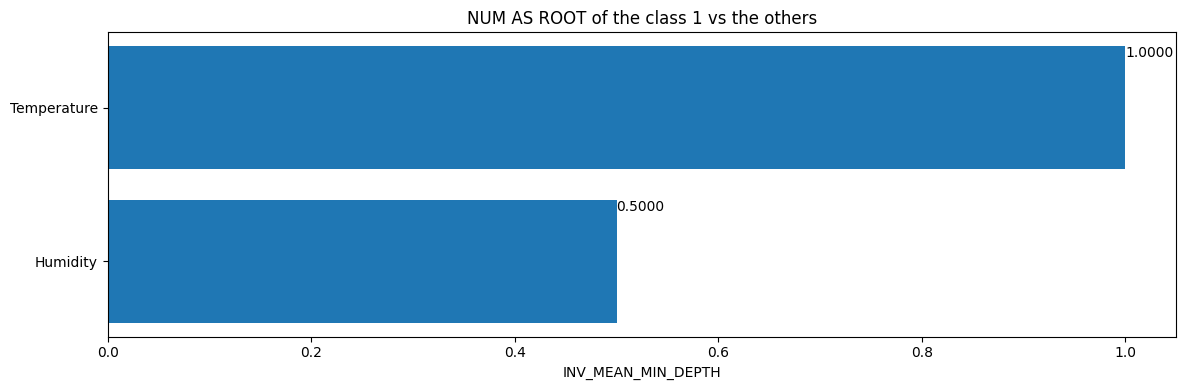

Variable Importances Data Structure:
{'NUM_AS_ROOT': [("Temperature" (1; #4), 1.0)], 'INV_MEAN_MIN_DEPTH': [("Temperature" (1; #4), 1.0), ("Humidity" (1; #1), 0.5)], 'NUM_NODES': [("Humidity" (1; #1), 1.0), ("Temperature" (1; #4), 1.0)], 'SUM_SCORE': [("Temperature" (1; #4), 3.381036087870598), ("Humidity" (1; #1), 3.1378071904182434)]}


In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "INV_MEAN_MIN_DEPTH" # NUM_AS_ROOT NUM_NODES SUM_SCORE INV_MEAN_MIN_DEPTH
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Check the length of variable_importances
print(f"Number of features: {len(variable_importances)}")

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

print("Variable Importances Data Structure:")
print(inspector.variable_importances())

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE


In [ ]:
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]

[("Temperature" (1; #4), 1.0), ("Humidity" (1; #1), 0.5)]

#Predict

In [ ]:
dataset = pd.read_csv("plant_growth_data.csv")

plantNumber = dataset.pop("Plant_Number")


One-hot Encode for full dataset

In [ ]:
dataset_encoded = pd.get_dummies(dataset, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])

# Convert boolean to binary
dataset_encoded_binary = dataset_encoded.astype(int)

# Ensure binary values
soilType_columns = [col for col in dataset_encoded.columns if 'Soil_Type_' in col]
dataset_encoded[soilType_columns] = dataset_encoded[soilType_columns].astype(int)

waterFrequency_columns = [col for col in dataset_encoded.columns if 'Water_Frequency_' in col]
dataset_encoded[waterFrequency_columns] = dataset_encoded[waterFrequency_columns].astype(int)

fertilizerType_columns = [col for col in dataset_encoded.columns if 'Fertilizer_Type_' in col]
dataset_encoded[fertilizerType_columns] = dataset_encoded[fertilizerType_columns].astype(int)

dataset_encoded.head(3)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,0,1,0,1,0,0,1,0,0
1,4.033133,28.919484,52.422276,1,0,0,1,0,0,1,0,0,1
2,8.892769,23.179059,44.660539,0,0,1,0,1,0,0,0,1,0


In [ ]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    dataset,
    task = tfdf.keras.Task.CLASSIFICATION)

preds = rf.predict(test_ds)

# Check the shape of the preds array
print(preds.shape)

# If preds is not already 1-dimensional, flatten it
if preds.ndim > 1:
    preds = preds.squeeze()

# Convert probabilities to class labels for binary classification
# Assuming the predictions are probabilities for class 1
preds_class = (preds > 0.5).astype(int)

# Ensure name is the correct length and convert it to a list if it's not already
if not isinstance(plantNumber, list):
    plant_Number = plantNumber.tolist()

# Create the DataFrame with names and predicted performance scores
output = pd.DataFrame({
    'Plant_Number': plantNumber[:len(preds_class)],  # Slice to ensure matching length
    'Growth_Milestone': preds_class,
    'Growth_Probability': preds
})


output.head(20)

1/1 [==============================] - 0s 138ms/step
(193, 1)


,Plant_Number,Growth_Milestone,Growth_Probability
0,1,0,0.373333
1,2,1,0.896666
2,3,0,0.410000
3,4,0,0.443333
4,5,0,0.286666
5,6,0,0.066667
6,7,1,0.833333
7,8,1,0.856666
8,9,1,0.613333
9,10,1,0.863333
